# Development and Validation of an Adaptive Machine Learning Pipeline for Cardiovascular Disease Risk Prediction

### Backgroung:
The primary cause of morbidity and mortality worldwide is cardiovascular disease (CVD). Brunei Darussalam is no exception; CVDs were the leading cause of death in 2015. Therefore, CVDs have substantial effects on public health and will eventually impair Brunei's economically productive workforce. In Brunei, the sole recommended technique for assessing CVD risk is the WHO/ISH risk prediction chart, which has not been validated in the local population. During the COVID-19 pandemic, MOH Brunei Darussalam developed the BruHealth mobile application on a digital platform with several essential features that have a significant impact on the general public's health. 

### Methods: 
A Supervised Classification Machine Learning Problem using standard libraries and modules in the Python3 environment and the TensorFlow backend since **an Adaptive AI predictive modelling pipeline of machine learning algorithms** will be developed and validated using open source CVD risk data collated form the literature and then will be tested by local Bruneian CVD risk data and then will be continously updated and adapted with the prospectively populated CVD risk data through BruHealth national mobile application.

### Objectives
1. To develop an Adaptive pipeline of different ML and DL algorithms for predicting the risk of the future CVD events and tested by Brunei-specific CVD risk data.
2. To estimate the accuracy, sensitivity (recall), specificity, positive predictive value (precision), area under the ROC curve (AUC ROC), the area under the precision-recall curve (AUC PR) and F1 score of the developed ML/DL algorithms pipeline.
3. To compare and prioritize the performance of the different ML/DL classifiers used in developing this automated CVD risk calculator using calculated metrics using an internal validation by splitting the data into training and validation dataset and an external testing by local Bruneian CVD risk data.

## Importing Libraries

In [1]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np

# Data Visualizations
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
%matplotlib inline
import seaborn as sns

# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler

# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score,precision_score,roc_auc_score,roc_curve
from sklearn.metrics import PrecisionRecallDisplay

# TensorFlow and tf.keras
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Ensembling
from mlxtend.classifier import StackingCVClassifier

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Reading the lab_based dataset

In [2]:
# Reading office_based dataset
lab_df = pd.read_csv(
    "~/Desktop/CVD risk prediction Notebook/Datasets/lab_based_dataset_balanced.csv")

# Informtion about the raw dataset
lab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       49572 non-null  int64  
 1   Age              49572 non-null  float64
 2   Gender           49572 non-null  int64  
 3   SysBP            49572 non-null  float64
 4   Diabetes         49572 non-null  int64  
 5   Smoking          49572 non-null  int64  
 6   Tot_Chol_mmol/l  49572 non-null  float64
 7   CVD risk         49572 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 3.0 MB


In [3]:
# define variable columns based on office-based CVD screening strategy
lab_df = lab_df.loc[:,['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l','CVD risk']]
lab_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l,CVD risk
0,39.0,2,106.0,0,0,5.0,0
1,46.0,1,121.0,0,0,6.5,0
2,48.0,2,127.5,0,1,6.3,0
3,46.0,1,130.0,0,1,7.4,0
4,43.0,1,180.0,0,0,5.9,0


# Predictive ML Modeling

Introduction
---
- We will predict the risk of cardiovascular disease in the screeing population based on our office-based dataset using several Machine Learning (ML) algorithms. Pipeline and ensembeling techniques of these various ML algorithms will be used, and their outputs are being compared to one another.

We use the following different machine learning models for the dataset:
---

1. Logistic Regression
2. K-Nearest Neighbour Classifier
3. Decision Tree Classifier
4. Random Forest Classifier
5. Gradient Boosting Classifier
6. Support Vector Machine
7. Gaussian Naive Bayes
8. Finally, **Staking ML ensembling**

9. **Artificial Neural Network**


## Model preparation

---

### Train test split

- We will employ the most typical split ratio of 80:20. Thus, 80% of the dataset is used for the training set, and 20% is used for the testing set.

In [4]:
#Train-test-split for non-scaled dataset

y = lab_df['CVD risk']
X = lab_df.drop(['CVD risk'], axis=1)
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=1)

#Splitted Data
print('train_x shape is ' , train_x.shape)
print('test_x shape is ' , test_x.shape)
print('train_y shape is ' , train_y.shape)
print('test_y shape is ' , test_y.shape)

train_x shape is  (39657, 6)
test_x shape is  (9915, 6)
train_y shape is  (39657,)
test_y shape is  (9915,)



---

### Feature Scaling

- We have multiple features with different scales. We will use MinMaxScaler library to standardize the data in such a manner that it has mean as 0 and standard deviation as 1.
- It is crucial for distance based models e.g. KNN, SVM, to perform standardization to prevent features with wider ranges from dominating the distance metric.

In [5]:
# Scaling of the train and test datasets
scaler = MinMaxScaler()
train_x = scaler.fit_transform(train_x)
test_x = scaler.transform(test_x)

In [6]:
train_x_df = pd.DataFrame(train_x, columns= ['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l'])
train_x_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l
0,0.415385,0.0,0.275737,0.0,1.0,0.344538
1,0.092308,1.0,0.124159,0.0,0.0,0.243697
2,0.584615,1.0,0.230729,0.0,0.0,0.554622
3,0.015385,0.0,0.137610,0.0,1.0,0.260504
4,0.584615,0.0,0.365235,1.0,1.0,0.243697


In [7]:
test_x_df = pd.DataFrame(test_x, columns= ['Age','Gender','SysBP','Diabetes','Smoking','Tot_Chol_mmol/l'])
test_x_df.head()

,Age,Gender,SysBP,Diabetes,Smoking,Tot_Chol_mmol/l
0,0.969231,0.0,0.275737,0.0,0.0,0.243697
1,0.430769,1.0,0.399897,1.0,0.0,0.361345
2,0.815385,1.0,0.389550,0.0,0.0,0.285714
3,1.000000,0.0,0.613554,0.0,0.0,0.260504
4,0.753846,0.0,0.327470,0.0,0.0,0.243697


## ML Models

---

### 1- Logistic regression

- Logistic regression is usually used for Binary classification problems. Binary Classification refers to predicting the output variable that is discrete in two classes.

The accuracy score of LogisticRegression is: 71.72 %
Sensitivity (True Positive Rate) of LogisticRegression is: 72.59 %
The f1 score for LogisticRegression is 71.8 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      4997
           1       0.71      0.73      0.72      4918

    accuracy                           0.72      9915
   macro avg       0.72      0.72      0.72      9915
weighted avg       0.72      0.72      0.72      9915



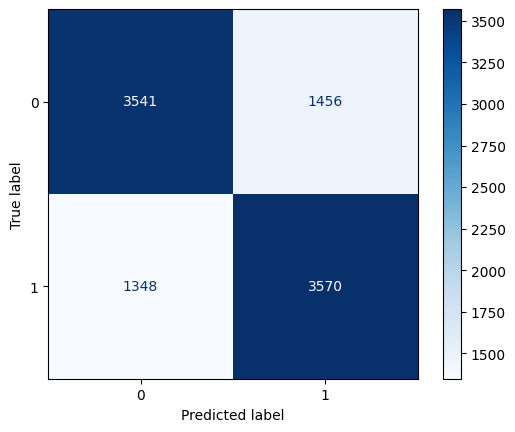

In [8]:
# Logistic Regression
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model_lr = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)

# Evaluation: Confusion matrix
###############################
lr_acc = accuracy_score(test_y, lr_predict)
cm = confusion_matrix(test_y, lr_predict) 
tpr_lr = cm[1][1] /(cm[1][0] + cm[1][1])
lr_f1 = f1_score(test_y, lr_predict)
print(f'The accuracy score of {m1} is: {round(lr_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m1} is: {round(tpr_lr*100,2)} %' ) 
print(f'The f1 score for {m1} is {round(lr_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, lr_predict ))

ConfusionMatrixDisplay.from_estimator(lr, test_x, test_y, cmap = 'Blues')
plt.show()

#### 1.2 - Tuned Logistic regression 

Using GridSearchCV allows us to optimize our model and try to find out the best hyperparameters for our dataset.

*  penalty — Specify the norm of the penalty.
*  C — Inverse of regularization strength; smaller values specify stronger regularization

In [16]:
# search for optimun parameters using gridsearch
parameters = {
     'penalty' : ['l1','l2'],  # l1: lasso  #l2: ridge
     'C' : [0.001,0.01,0.1,1,10,100],
    'class_weight':['balanced',None]
     }
#train the classifier
tun_lr = LogisticRegression()
clf_tun1 = GridSearchCV(tun_lr,                    
                   param_grid = parameters,   
                   scoring='accuracy',        
                   cv=10,
                       verbose=1,
                       n_jobs=-1)                      # number of folds GridSearchCV does an internal 5-fold cross validation
clf_tun = clf_tun1.fit(train_x,train_y)

#make predictions
tun_predict = clf_tun1.predict(test_x)
tun_accuracy = accuracy_score(test_y,tun_predict)

print("Tuned Hyperparameters :", clf_tun1.best_params_)
print(f"Accuracy : {round(tun_accuracy*100,2)} %",);

Fitting 10 folds for each of 24 candidates, totalling 240 fits
Tuned Hyperparameters : {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2'}
Accuracy : 71.61 %


The accuracy score of LogisticRegression is: 71.61%
Sensitivity (True Positive Rate) of LogisticRegression is: 72.39 %
The f1 score for LogisticRegression is 71.67%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      4997
           1       0.71      0.72      0.72      4918

    accuracy                           0.72      9915
   macro avg       0.72      0.72      0.72      9915
weighted avg       0.72      0.72      0.72      9915



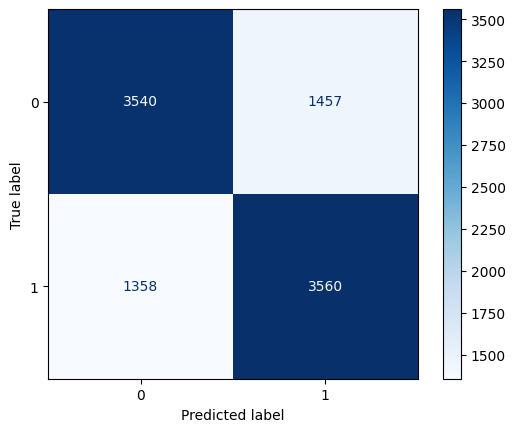

In [17]:
lr_tun = LogisticRegression(C = 0.01, class_weight =  'balanced', penalty = 'l2' )
model_lr_tun = lr_tun.fit(train_x, train_y)
lr_tun_predict = lr_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
lr_tun_acc_score = accuracy_score(test_y, lr_tun_predict)
lr_tun_conf_matrix = confusion_matrix(test_y, lr_tun_predict)
tpr_lr_tun = lr_tun_conf_matrix [1][1] /(lr_tun_conf_matrix [1][0] + lr_tun_conf_matrix [1][1])
lr_tun_f1 = f1_score(test_y, lr_tun_predict)

print(f"The accuracy score of {m1} is: {round(lr_tun_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m1} is: {round(tpr_lr_tun*100,2)} %' ) 
print(f"The f1 score for {m1} is {round(lr_tun_f1*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(test_y, lr_tun_predict))
ConfusionMatrixDisplay.from_estimator(lr_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

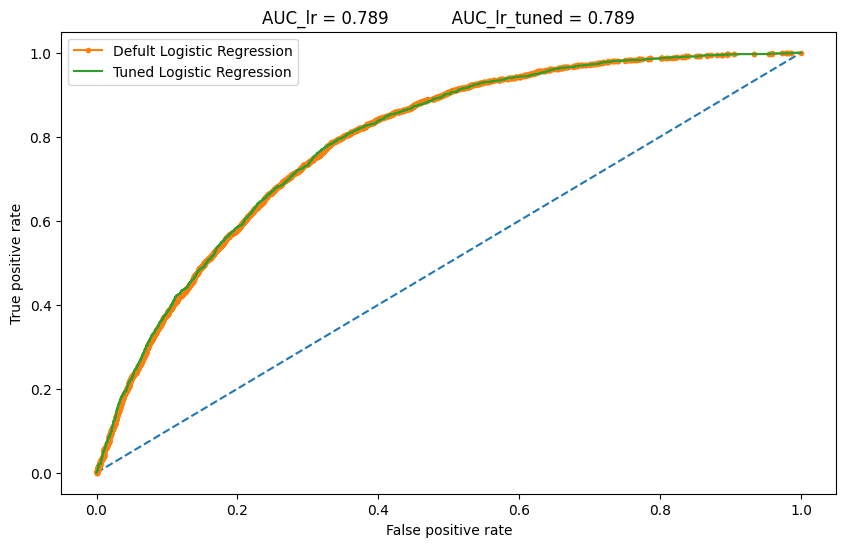

In [18]:
# ROC curve and AUC 
probs_lr = model_lr.predict_proba(test_x)
probs_lr_tun = model_lr_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_lr = probs_lr[:, 1]
probs_lr_tun = probs_lr_tun[:, 1]
# calculate AUC
auc_lr = roc_auc_score(test_y, probs_lr)
auc_lr_tun = roc_auc_score(test_y, probs_lr_tun)
# calculate roc curve
fpr_lr, tpr_lr, thresholds_lr = roc_curve(test_y, probs_lr)
fpr_lr_tun, tpr_lr_tun, thresholds_lr_tun = roc_curve(test_y, probs_lr_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_lr, tpr_lr, marker='.', label="Defult Logistic Regression")
plt.plot(fpr_lr_tun, tpr_lr_tun, label="Tuned Logistic Regression")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_lr = {round(auc_lr,3)}            AUC_lr_tuned = {round(auc_lr_tun,3)}")
plt.legend()
plt.show();

***Hyperparameter tuning gives the similar Accuracy and AUC as the defult Logistic regression model.*** 

#### Drawing Percision-Recall curve (PRC)

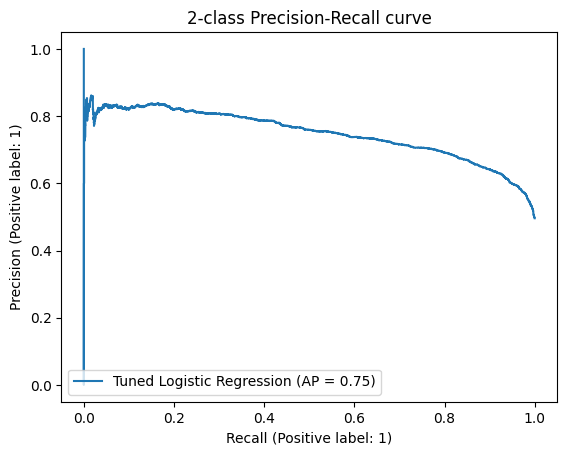

In [19]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_lr_tun, name="Tuned Logistic Regression")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---

### 2 - K-Nearest Neighbors 

- KNN is a widely used machine learning approach for classification tasks. An observation is classified by considering the K nearest neighbors and taking a majority vote.


The accuracy score of KNeighborsClassifier is: 93.67%
Sensitivity (True Positive Rate) of KNeighborsClassifier is: 99.23 %
The f1 score for KNeighborsClassifier is 93.95%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4997
           1       0.89      0.99      0.94      4918

    accuracy                           0.94      9915
   macro avg       0.94      0.94      0.94      9915
weighted avg       0.94      0.94      0.94      9915



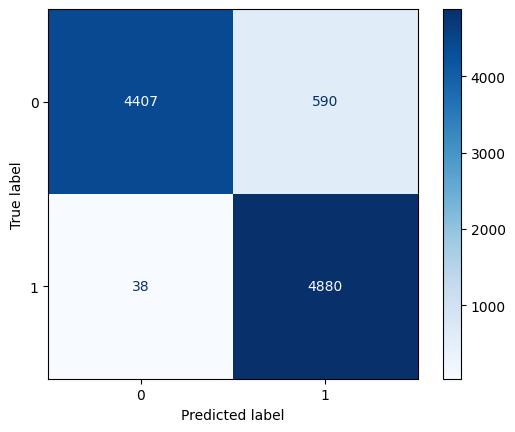

In [20]:
# K-Nearest Neighbors 
m2 = 'KNeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=1)
model_knn = knn.fit(train_x, train_y)
knn_predict = knn.predict(test_x)

# Evaluation: Confusion matrix#
###############################
knn_acc_score = accuracy_score(test_y, knn_predict)
knn_conf_matrix = confusion_matrix(test_y, knn_predict)
tpr_knn = knn_conf_matrix[1][1] /(knn_conf_matrix[1][0] + knn_conf_matrix[1][1])
knn_f1 = f1_score(test_y, knn_predict)

print(f"The accuracy score of {m2} is: {round(knn_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m2} is: {round(tpr_knn*100,2)} %' ) 
print(f"The f1 score for {m2} is {round(knn_f1*100,2)}%")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, knn_predict))
ConfusionMatrixDisplay.from_estimator(knn, test_x, test_y, cmap = 'Blues')
plt.show()

#### Searching for the Best value for K in KNN classifier

In [22]:
# Calculating accuracy for every value of K
n_neighbors = range(1,11,1)
training_accuracy = []
test_accuracy = []

index = 0
for n in n_neighbors:
    Knn_n = KNeighborsClassifier(n_neighbors=n)
    Knn_n.fit(train_x,train_y)
    training_accuracy.append(Knn_n.score(train_x,train_y))
    test_accuracy.append(Knn_n.score(test_x,test_y))
    print(f"Training accuracy for K = {n_neighbors[index]} nearest Neighbors: {round(training_accuracy[index]*100,2)}%")
    print(f"Test accuracy for K = {n_neighbors[index]} nearest Neighbors: {round(test_accuracy[index]*100,2)}%")

    index = index + 1  

Training accuracy for K = 1 nearest Neighbors: 99.76%
Test accuracy for K = 1 nearest Neighbors: 93.67%
Training accuracy for K = 2 nearest Neighbors: 99.54%
Test accuracy for K = 2 nearest Neighbors: 92.87%
Training accuracy for K = 3 nearest Neighbors: 93.63%
Test accuracy for K = 3 nearest Neighbors: 88.72%
Training accuracy for K = 4 nearest Neighbors: 93.33%
Test accuracy for K = 4 nearest Neighbors: 87.34%
Training accuracy for K = 5 nearest Neighbors: 89.23%
Test accuracy for K = 5 nearest Neighbors: 84.46%
Training accuracy for K = 6 nearest Neighbors: 88.81%
Test accuracy for K = 6 nearest Neighbors: 83.05%
Training accuracy for K = 7 nearest Neighbors: 85.82%
Test accuracy for K = 7 nearest Neighbors: 81.39%
Training accuracy for K = 8 nearest Neighbors: 85.19%
Test accuracy for K = 8 nearest Neighbors: 80.19%
Training accuracy for K = 9 nearest Neighbors: 83.1%
Test accuracy for K = 9 nearest Neighbors: 79.18%
Training accuracy for K = 10 nearest Neighbors: 82.69%
Test accur

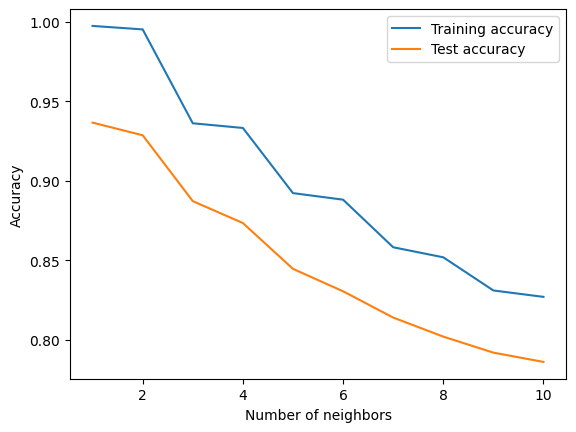

In [23]:
# plotting KNN training vs testing accuracy
plt.plot(n_neighbors, training_accuracy, label="Training accuracy")
plt.plot(n_neighbors, test_accuracy, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Number of neighbors")
plt.legend();

#### 2.2 - Tuned K-Nearest Neighbors 

The accuracy score of KNeighborsClassifier is: 93.67%
Sensitivity (True Positive Rate) of KNeighborsClassifier is: 99.23 %
The f1 score for KNeighborsClassifier is 93.95%

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4997
           1       0.89      0.99      0.94      4918

    accuracy                           0.94      9915
   macro avg       0.94      0.94      0.94      9915
weighted avg       0.94      0.94      0.94      9915



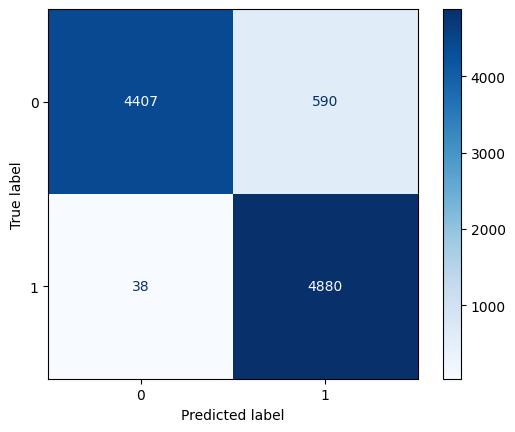

In [24]:
knn_tun = KNeighborsClassifier(n_neighbors=1)
model_knn_tun = knn_tun.fit(train_x, train_y)
knn_tun_predict = knn_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
knn_tun_acc_score = accuracy_score(test_y, knn_tun_predict)
knn_tun_conf_matrix = confusion_matrix(test_y, knn_tun_predict)
tpr_knn_tun = knn_tun_conf_matrix [1][1] /(knn_tun_conf_matrix [1][0] + knn_tun_conf_matrix [1][1])
knn_tun_f1 = f1_score(test_y, knn_tun_predict)

print(f"The accuracy score of {m2} is: {round(knn_tun_acc_score*100,2)}%")
print(f'Sensitivity (True Positive Rate) of {m2} is: {round(tpr_knn_tun*100,2)} %' ) 
print(f"The f1 score for {m2} is {round(knn_tun_f1*100,2)}%")
print('\n Confusion matrix \n \n')
print(classification_report(test_y, knn_tun_predict))
ConfusionMatrixDisplay.from_estimator(knn_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

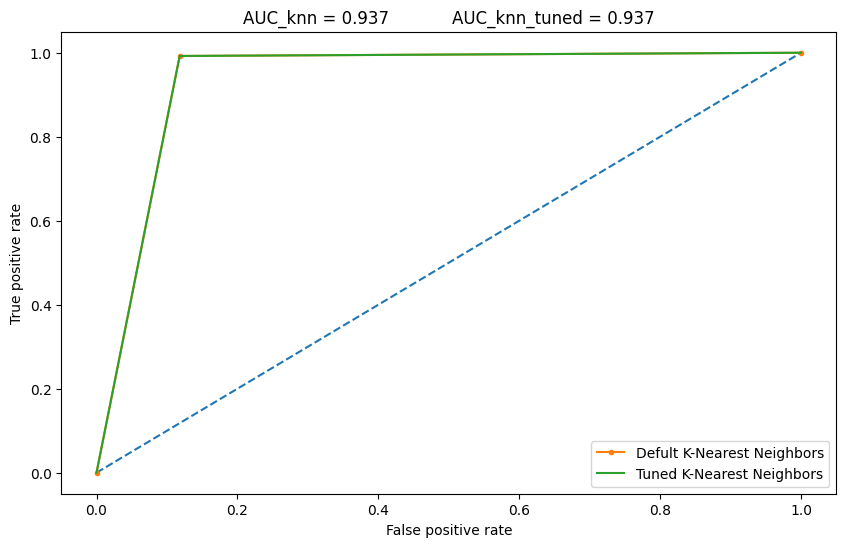

In [25]:
# ROC curve and AUC 
probs_knn = model_knn.predict_proba(test_x)
probs_knn_tun = model_knn_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_knn = probs_knn[:, 1]
probs_knn_tun = probs_knn_tun[:, 1]
# calculate AUC
auc_knn = roc_auc_score(test_y, probs_knn)
auc_knn_tun = roc_auc_score(test_y, probs_knn_tun)
# calculate roc curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(test_y, probs_knn)
fpr_knn_tun, tpr_knn_tun, thresholds_knn_tun = roc_curve(test_y, probs_knn_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_knn, tpr_knn, marker='.', label="Defult K-Nearest Neighbors")
plt.plot(fpr_knn_tun, tpr_knn_tun, label="Tuned K-Nearest Neighbors")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_knn = {round(auc_knn,3)}            AUC_knn_tuned = {round(auc_knn_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

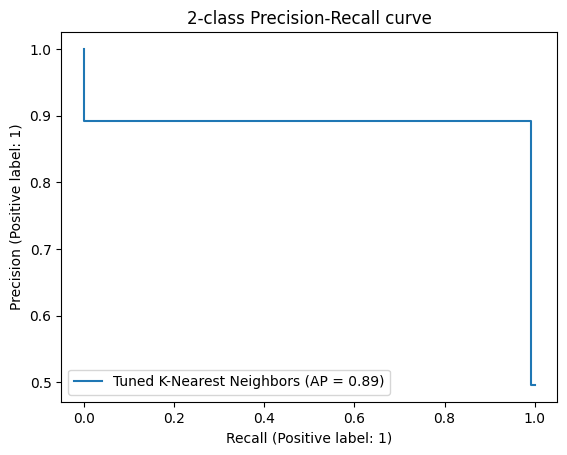

In [26]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_knn_tun, name="Tuned K-Nearest Neighbors")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---

### 3 - Decision Tree Classifier

The accuracy score of DecisionTreeClassifier is: 93.51 %
Sensitivity (True Positive Rate) = 99.55 %
The f1 score for DecisionTreeClassifier is 93.84 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.88      0.93      4997
           1       0.89      1.00      0.94      4918

    accuracy                           0.94      9915
   macro avg       0.94      0.94      0.93      9915
weighted avg       0.94      0.94      0.93      9915



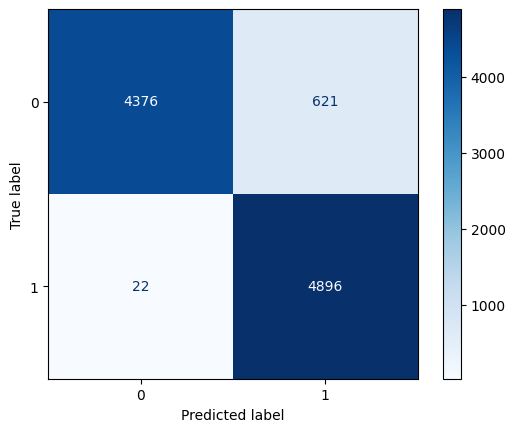

In [27]:
# Decision Tree Classifier 
m3 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(random_state=0)
model_dt = dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)

# Evaluation: Confusion matrix#
###############################
dt_acc_score = accuracy_score(test_y, dt_predicted)
dt_conf_matrix = confusion_matrix(test_y, dt_predicted)
dt_tpr = dt_conf_matrix[1][1] /(dt_conf_matrix[1][0] + dt_conf_matrix[1][1])
dt_f1 = f1_score(test_y, dt_predicted)

print(f"The accuracy score of {m3} is: {round(dt_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) = {round(dt_tpr*100,2)} %' ) 
print(f"The f1 score for {m3} is {round(dt_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, dt_predicted))
ConfusionMatrixDisplay.from_estimator(dt, test_x, test_y, cmap = 'Blues')
plt.show()

#### Searching for the Best Max_Depth for Decision Tree classifier

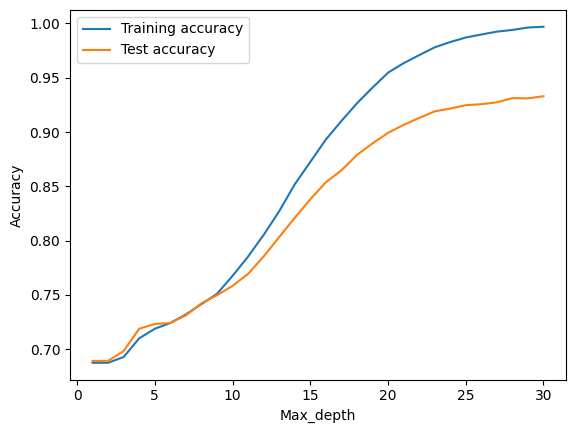

In [28]:
#Hyperparameter tuning for max_depth
train_acc1 = []
test_acc1 = []

for max_d in range(1,31):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=0)
  model.fit(train_x, train_y)
  train_acc1.append(model.score(train_x, train_y))
  test_acc1.append(model.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot([*range(1,31)], train_acc1, label="Training accuracy")
plt.plot([*range(1,31)], test_acc1, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

#### Grid Search for optimum parameters other than Max_depth

In [43]:
# grid search for optimum parameters
params = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
         'criterion': ['gini', 'entropy'],
         'max_depth' :range(1,31)}
tree_clf = GridSearchCV(dt, param_grid=params,verbose=2, n_jobs=-1)

In [45]:
# train the model
tree_clf.fit(train_x,train_y)
tree_clf.best_params_

Fitting 5 folds for each of 27720 candidates, totalling 138600 fits


{'criterion': 'gini',
 'max_depth': 28,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

#### 3.2 - Tuned Decision Tree

The accuracy score of DecisionTreeClassifier is: 93.69 %
Sensitivity (True Positive Rate) = 99.57 %
The f1 score for DecisionTreeClassifier is 93.99 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       1.00      0.88      0.93      4997
           1       0.89      1.00      0.94      4918

    accuracy                           0.94      9915
   macro avg       0.94      0.94      0.94      9915
weighted avg       0.94      0.94      0.94      9915



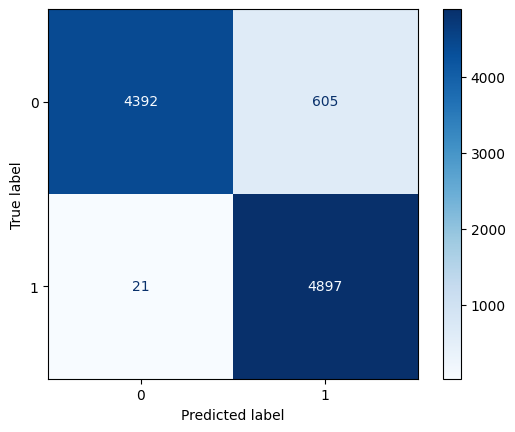

In [46]:
dt_tun = DecisionTreeClassifier(criterion = 'gini',
                                max_features= 'auto',
                                min_samples_leaf = 1,
                                min_samples_split = 2,
                                max_depth = 28,
                                random_state=0,)
model_dt_tun = dt_tun.fit(train_x,train_y)
dt_tun_predicted = dt_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
dt_tun_acc_score = accuracy_score(test_y, dt_tun_predicted)
dt_tun_conf_matrix = confusion_matrix(test_y, dt_tun_predicted)
dt_tun_tpr = dt_tun_conf_matrix[1][1] /(dt_tun_conf_matrix[1][0] + dt_tun_conf_matrix[1][1])
dt_tun_f1 = f1_score(test_y, dt_tun_predicted)

print(f"The accuracy score of {m3} is: {round(dt_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) = {round(dt_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m3} is {round(dt_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, dt_tun_predicted))
ConfusionMatrixDisplay.from_estimator(dt_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

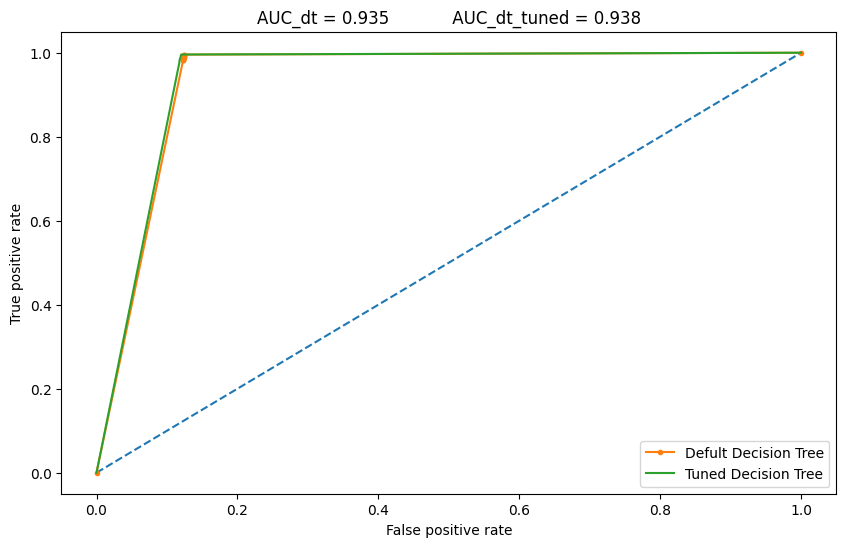

In [47]:
# ROC curve and AUC 
probs_dt = model_dt.predict_proba(test_x)
probs_dt_tun = model_dt_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_dt = probs_dt[:, 1]
probs_dt_tun = probs_dt_tun[:, 1]
# calculate AUC
auc_dt = roc_auc_score(test_y, probs_dt)
auc_dt_tun = roc_auc_score(test_y, probs_dt_tun)
# calculate roc curve
fpr_dt, tpr_dt, thresholds_dt = roc_curve(test_y, probs_dt)
fpr_dt_tun, tpr_dt_tun, thresholds_dt_tun = roc_curve(test_y, probs_dt_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_dt, tpr_dt, marker='.', label="Defult Decision Tree")
plt.plot(fpr_dt_tun, tpr_dt_tun, label="Tuned Decision Tree")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_dt = {round(auc_dt,3)}            AUC_dt_tuned = {round(auc_dt_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

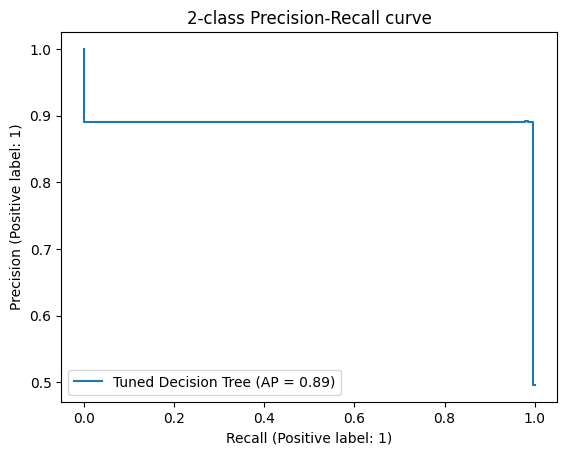

In [48]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_dt_tun, name="Tuned Decision Tree")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---

### 4 - Random Forest Classifier

The accuracy score of Random Forest Classfier is: 94.75 %
Sensitivity (True Positive Rate) of Random Forest Classfier = 99.53 %
The f1 score for Random Forest Classfier is 94.95 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.90      0.95      4997
           1       0.91      1.00      0.95      4918

    accuracy                           0.95      9915
   macro avg       0.95      0.95      0.95      9915
weighted avg       0.95      0.95      0.95      9915



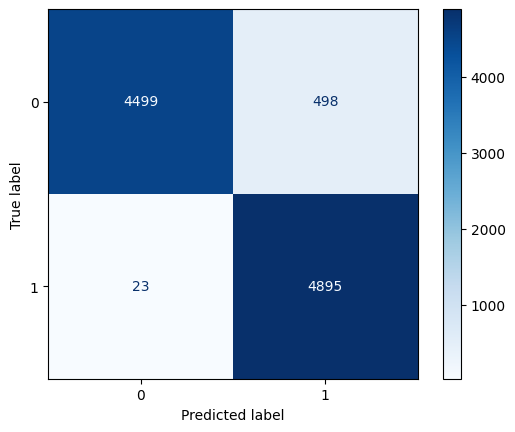

In [49]:
# Random Forest Classfier 
m4 = 'Random Forest Classfier'
rf = RandomForestClassifier(random_state=0)
model_rf = rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)

# Evaluation: Confusion matrix#
###############################
rf_acc_score = accuracy_score(test_y, rf_predicted)
rf_conf_matrix = confusion_matrix(test_y, rf_predicted)
rf_tpr = rf_conf_matrix[1][1] /(rf_conf_matrix[1][0] + rf_conf_matrix[1][1])
rf_f1 = f1_score(test_y, rf_predicted)

print(f"The accuracy score of {m4} is: {round(rf_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m4} = {round(rf_tpr*100,2)} %' ) 
print(f"The f1 score for {m4} is {round(rf_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, rf_predicted))
ConfusionMatrixDisplay.from_estimator(rf, test_x, test_y, cmap = 'Blues')
plt.show()

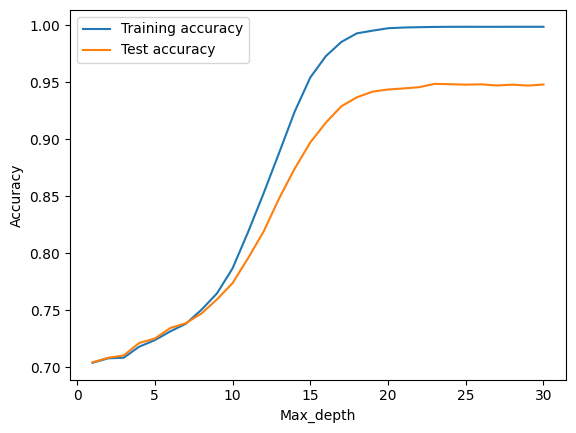

In [50]:
#Hyperparameter tuning for max_depth
train_acc2 = []
test_acc2 = []
max_depth = range(1,31)

for max_d in max_depth:
  model2 = RandomForestClassifier(max_depth=max_d, random_state=0)
  model2.fit(train_x, train_y)
  train_acc2.append(model2.score(train_x, train_y))
  test_acc2.append(model2.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot(max_depth, train_acc2, label="Training accuracy")
plt.plot(max_depth, test_acc2, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

#### Grid Search for optimum parameters for Random Forest Classifier

In [56]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']


# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

max_depth = list(range(1,31))

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [57]:
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, 
                               cv = 3, 
                               verbose=2, 
                               random_state=7, 
                               n_jobs = -1)

# Fit the random search model
rf_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15,
                                                      16, 17, 18, 19, 20, 21,
                                                      22, 23, 24, 25, 26, 27,
                                                      28, 29, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=7, verbose=2)

In [58]:
rf_random.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=24, max_features='auto',
                       n_estimators=400, random_state=0)

#### 4.2 - Tuned Random Forest

The accuracy score of Random Forest Classfier is: 96.15 %
Sensitivity (True Positive Rate) of Random Forest Classfier is: 99.45 %
The f1 score for Random Forest Classfier is 96.24 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      4997
           1       0.93      0.99      0.96      4918

    accuracy                           0.96      9915
   macro avg       0.96      0.96      0.96      9915
weighted avg       0.96      0.96      0.96      9915



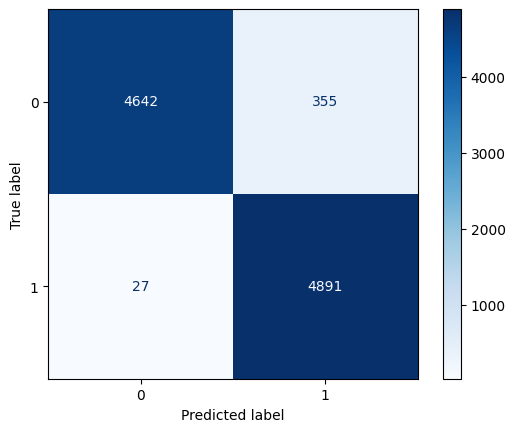

In [59]:
rf_tun = rf_random.best_estimator_
model_rf_tun = rf_tun.fit(train_x,train_y)
rf_tun_predicted = rf_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
rf_tun_acc_score = accuracy_score(test_y, rf_tun_predicted)
rf_tun_conf_matrix = confusion_matrix(test_y, rf_tun_predicted)
rf_tun_tpr = rf_tun_conf_matrix[1][1] /(rf_tun_conf_matrix[1][0] + rf_tun_conf_matrix[1][1])
rf_tun_f1 = f1_score(test_y, rf_tun_predicted)

print(f"The accuracy score of {m4} is: {round(rf_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m4} is: {round(rf_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m4} is {round(rf_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, rf_tun_predicted))
ConfusionMatrixDisplay.from_estimator(rf_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

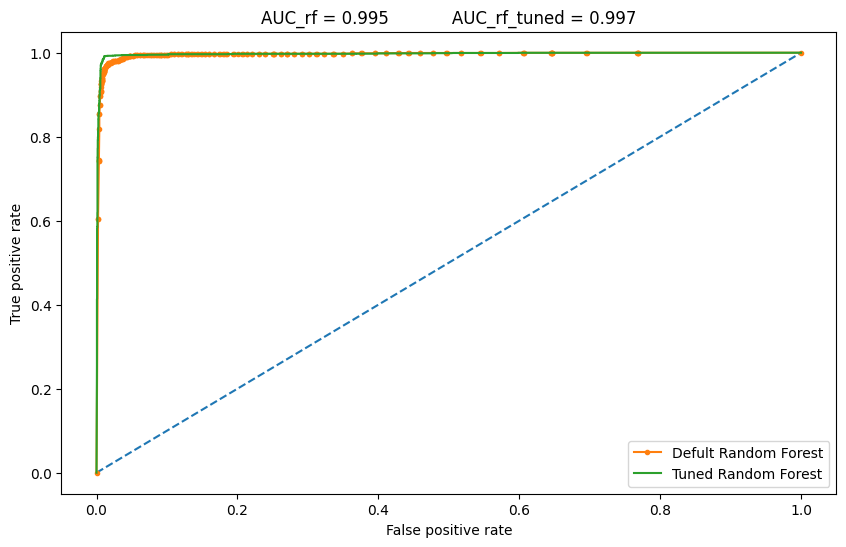

In [60]:
# ROC curve and AUC 
probs_rf = model_rf.predict_proba(test_x)
probs_rf_tun = model_rf_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_rf = probs_rf[:, 1]
probs_rf_tun = probs_rf_tun[:, 1]
# calculate AUC
auc_rf = roc_auc_score(test_y, probs_rf)
auc_rf_tun = roc_auc_score(test_y, probs_rf_tun)
# calculate roc curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(test_y, probs_rf)
fpr_rf_tun, tpr_rf_tun, thresholds_rf_tun = roc_curve(test_y, probs_rf_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_rf, tpr_rf, marker='.', label="Defult Random Forest")
plt.plot(fpr_rf_tun, tpr_rf_tun, label="Tuned Random Forest")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_rf = {round(auc_rf,3)}            AUC_rf_tuned = {round(auc_rf_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

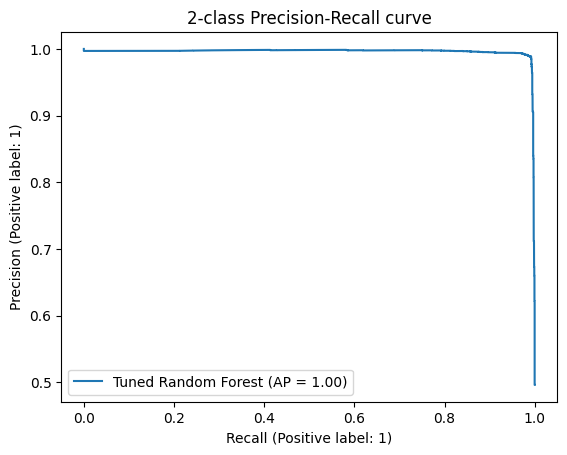

In [61]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_rf_tun, name="Tuned Random Forest")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---

### 5 - Gradient Boosting Classifier

The accuracy score of Gradient Boosting Classifier is: 74.31 %
Sensitivity (True Positive Rate) of Gradient Boosting Classifier = 80.97 %
The f1 score for Gradient Boosting Classifier is 75.77 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.78      0.68      0.73      4997
           1       0.71      0.81      0.76      4918

    accuracy                           0.74      9915
   macro avg       0.75      0.74      0.74      9915
weighted avg       0.75      0.74      0.74      9915



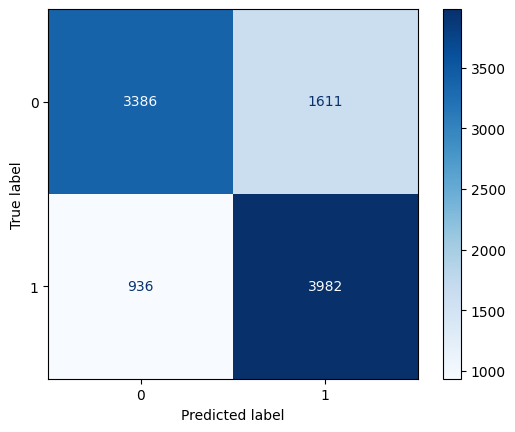

In [62]:
# Random Forest Classfier 
m5 = 'Gradient Boosting Classifier'
gb = GradientBoostingClassifier(random_state=0)
model_gb = gb.fit(train_x,train_y)
gb_predicted = gb.predict(test_x)

# Evaluation: Confusion matrix#
###############################
gb_acc_score = accuracy_score(test_y, gb_predicted)
gb_conf_matrix = confusion_matrix(test_y, gb_predicted)
gb_tpr = gb_conf_matrix[1][1] /(gb_conf_matrix[1][0] + gb_conf_matrix[1][1])
gb_f1 = f1_score(test_y, gb_predicted)

print(f"The accuracy score of {m5} is: {round(gb_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m5} = {round(gb_tpr*100,2)} %' ) 
print(f"The f1 score for {m5} is {round(gb_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, gb_predicted))
ConfusionMatrixDisplay.from_estimator(gb, test_x, test_y, cmap = 'Blues')
plt.show()

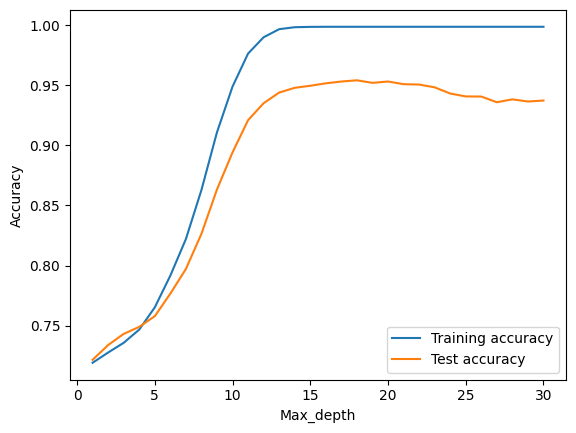

In [63]:
#Hyperparameter tuning for max_depth
train_acc3 = []
test_acc3 = []
max_depth = range(1,31)

for max_d in max_depth:
  model3 = GradientBoostingClassifier(max_depth=max_d, random_state=0)
  model3.fit(train_x, train_y)
  train_acc3.append(model3.score(train_x, train_y))
  test_acc3.append(model3.score(test_x,test_y))

# plotting KNN training vs testing accuracy
plt.plot(max_depth, train_acc3, label="Training accuracy")
plt.plot(max_depth, test_acc3, label="Test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Max_depth")
plt.legend();

In [67]:
#Number of trees
n_estimators = [int(i) for i in np.linspace(start=100,stop=1000,num=10)]

#Number of features to consider at every split
max_features = ['auto','sqrt']

#Minimum number of samples required to split a node
min_samples_split=[2,5,10]

#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,4]

max_depth = list(range(1,31))

#Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'max_features': max_features,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
#Random search of parameters, using 3 fold cross validation, 
#search across 100 different combinations
gb_random = RandomizedSearchCV(estimator=gb,
                               param_distributions=random_grid,
                               n_iter=100,
                               cv=3, 
                               verbose=2, 
                               random_state=0, 
                               n_jobs=-1,
                               return_train_score=True)

# Fit the random search model
gb_random.fit(train_x,train_y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
gb_random.best_estimator_

#### 5.2 - Tuned Gradient Boosting Classifier

In [ ]:
gb_tun =  gb_random.best_estimator_
model_gb_tun = gb_tun.fit(train_x,train_y)
gb_tun_predicted = gb_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
gb_tun_acc_score = accuracy_score(test_y, gb_tun_predicted)
gb_tun_conf_matrix = confusion_matrix(test_y, gb_tun_predicted)
gb_tun_tpr = rf_tun_conf_matrix[1][1] /(gb_tun_conf_matrix[1][0] + gb_tun_conf_matrix[1][1])
gb_tun_f1 = f1_score(test_y, gb_tun_predicted)

print(f"The accuracy score of {m5} is: {round(gb_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m5} is: {round(gb_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m5} is {round(gb_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, gb_tun_predicted))
ConfusionMatrixDisplay.from_estimator(gb_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

In [ ]:
# ROC curve and AUC 
probs_gb = model_gb.predict_proba(test_x)
probs_gb_tun = model_gb_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_gb = probs_gb[:, 1]
probs_gb_tun = probs_gb_tun[:, 1]
# calculate AUC
auc_gb = roc_auc_score(test_y, probs_gb)
auc_gb_tun = roc_auc_score(test_y, probs_gb_tun)
# calculate roc curve
fpr_gb, tpr_gb, thresholds_gb = roc_curve(test_y, probs_gb)
fpr_gb_tun, tpr_gb_tun, thresholds_gb_tun = roc_curve(test_y, probs_gb_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_gb, tpr_gb, marker='.', label="Defult Gradient Boosting Classifier")
plt.plot(fpr_gb_tun, tpr_gb_tun, label="Tuned Gradient Boosting Classifier")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_gb = {round(auc_gb,3)}            AUC_gb_tuned = {round(auc_gb_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

In [ ]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_gb_tun, name="Tuned Gradient Boosting Classifier")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---

### 6 - Support Vector Machine

The accuracy score of Support Vector Machine is: 79.81 %
Sensitivity (True Positive Rate) of Support Vector Machine = 73.4 %
The f1 score for Support Vector Machine is 77.32 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.78      0.85      0.82      8750
           1       0.82      0.73      0.77      7726

    accuracy                           0.80     16476
   macro avg       0.80      0.79      0.80     16476
weighted avg       0.80      0.80      0.80     16476



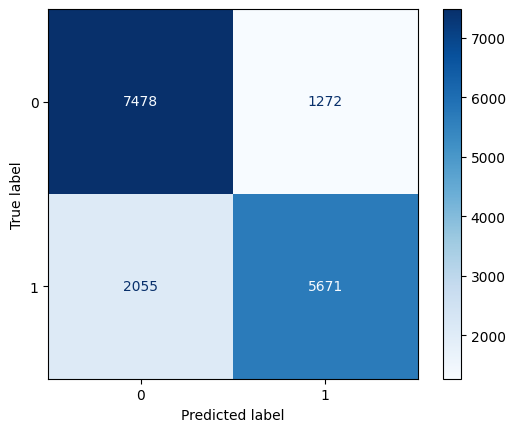

In [38]:
# Support Vector Machine
m6 = 'Support Vector Machine'
svm = SVC(probability=True)
model_svm = svm.fit(train_x,train_y)
svm_predicted = svm.predict(test_x)

# Evaluation: Confusion matrix#
###############################
svm_acc_score = accuracy_score(test_y, svm_predicted)
svm_conf_matrix = confusion_matrix(test_y, svm_predicted)
svm_tpr = svm_conf_matrix[1][1] /(svm_conf_matrix[1][0] + svm_conf_matrix[1][1])
svm_f1 = f1_score(test_y, svm_predicted)

print(f"The accuracy score of {m6} is: {round(svm_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m6} = {round(svm_tpr*100,2)} %' ) 
print(f"The f1 score for {m6} is {round(svm_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, svm_predicted))
ConfusionMatrixDisplay.from_estimator(svm, test_x, test_y, cmap = 'Blues')
plt.show()

#### Grid Search for optimum parameters for Support Vector Machine

In [13]:
#grid search for optimum parameters
Cs = [0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
param_grid = {'C': Cs,
              #'gamma' : gammas,
              'kernel': kernels}
svm_clf = GridSearchCV(SVC(), param_grid, cv=3, verbose=2)

# train the model
svm_clf.fit(train_x,train_y)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END ..............................C=0.01, kernel=linear; total time= 1.3min
[CV] END ..............................C=0.01, kernel=linear; total time= 1.2min
[CV] END ..............................C=0.01, kernel=linear; total time= 1.2min
[CV] END .................................C=0.01, kernel=rbf; total time= 3.2min
[CV] END .................................C=0.01, kernel=rbf; total time= 3.1min
[CV] END .................................C=0.01, kernel=rbf; total time= 3.3min
[CV] END ................................C=0.01, kernel=poly; total time= 1.1min
[CV] END ................................C=0.01, kernel=poly; total time= 1.1min
[CV] END ................................C=0.01, kernel=poly; total time= 1.1min
[CV] END .............................C=0.01, kernel=sigmoid; total time= 3.0min
[CV] END .............................C=0.01, kernel=sigmoid; total time= 3.1min
[CV] END .............................C=0.01, ke

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             verbose=2)

In [14]:
svm_clf.best_params_ 

{'C': 10, 'kernel': 'rbf'}

#### 6.2 - Tuned Support Vector Machine

The accuracy score of Support Vector Machine is: 80.0 %
Sensitivity (True Positive Rate) of Support Vector Machine is: 73.65 %
The f1 score for Support Vector Machine is 77.55 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      8750
           1       0.82      0.74      0.78      7726

    accuracy                           0.80     16476
   macro avg       0.80      0.80      0.80     16476
weighted avg       0.80      0.80      0.80     16476



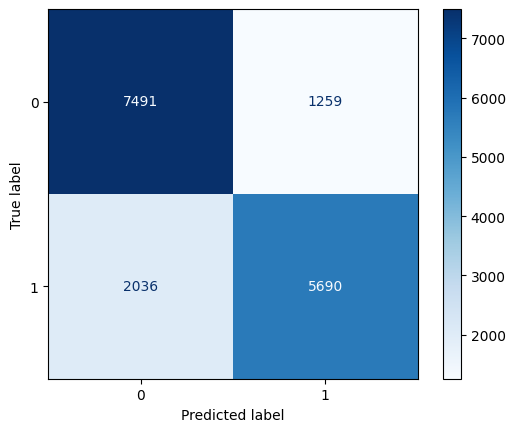

In [39]:
svm_tun =  SVC(C = 10, kernel = 'rbf', probability=True)
model_svm_tun = svm_tun.fit(train_x,train_y)
svm_tun_predicted = svm_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
svm_tun_acc_score = accuracy_score(test_y, svm_tun_predicted)
svm_tun_conf_matrix = confusion_matrix(test_y, svm_tun_predicted)
svm_tun_tpr = svm_tun_conf_matrix[1][1] /(svm_tun_conf_matrix[1][0] + svm_tun_conf_matrix[1][1])
svm_tun_f1 = f1_score(test_y, svm_tun_predicted)

print(f"The accuracy score of {m6} is: {round(svm_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m6} is: {round(svm_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m6} is {round(svm_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, svm_tun_predicted))
ConfusionMatrixDisplay.from_estimator(svm_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

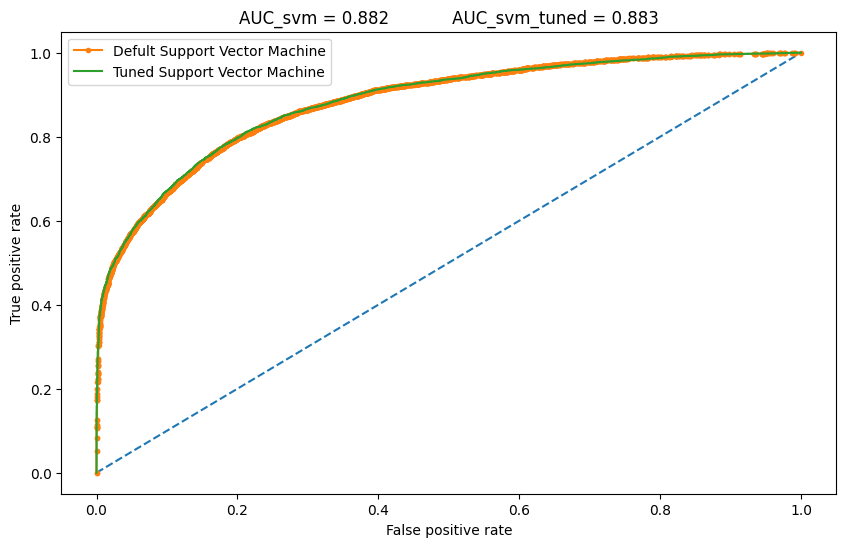

In [40]:
# ROC curve and AUC 
probs_svm = model_svm.predict_proba(test_x)
probs_svm_tun = model_svm_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_svm = probs_svm[:, 1]
probs_svm_tun = probs_svm_tun[:, 1]
# calculate AUC
auc_svm = roc_auc_score(test_y, probs_svm)
auc_svm_tun = roc_auc_score(test_y, probs_svm_tun)
# calculate roc curve
fpr_svm, tpr_svm,thresholds_svm = roc_curve(test_y, probs_svm)
fpr_svm_tun, tpr_svm_tun, thresholds_svm_tun = roc_curve(test_y, probs_svm_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_svm, tpr_svm, marker='.', label="Defult Support Vector Machine")
plt.plot(fpr_svm_tun, tpr_svm_tun, label="Tuned Support Vector Machine")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_svm = {round(auc_svm,3)}            AUC_svm_tuned = {round(auc_svm_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

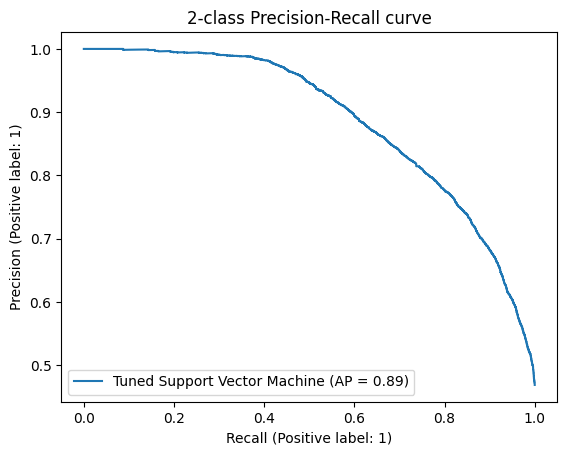

In [41]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_svm_tun, name="Tuned Support Vector Machine")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
### 7. Gaussian Naive Bayes

The accuracy score of Naive Bayes is: 76.92 %
Sensitivity (True Positive Rate) of Naive Bayes is: 71.55 %
The f1 score for Naive Bayes is: 74.41 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      8750
           1       0.77      0.72      0.74      7726

    accuracy                           0.77     16476
   macro avg       0.77      0.77      0.77     16476
weighted avg       0.77      0.77      0.77     16476



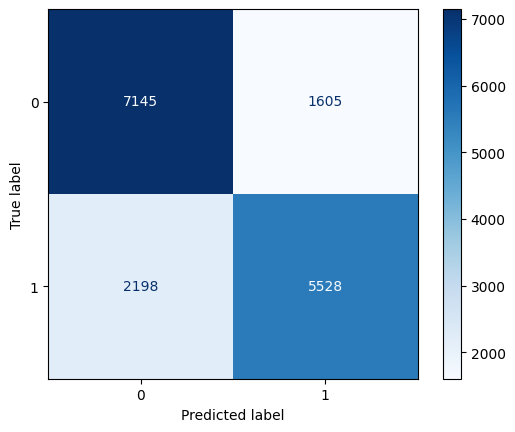

In [42]:
# Naive Bayes
m7 = 'Naive Bayes'
nb = GaussianNB()
model_nb = nb.fit(train_x,train_y)
nb_predicted = nb.predict(test_x)

# Evaluation: Confusion matrix#
###############################
nb_acc_score = accuracy_score(test_y, nb_predicted)
nb_conf_matrix = confusion_matrix(test_y, nb_predicted)
nb_tpr = nb_conf_matrix[1][1] /(nb_conf_matrix[1][0] + nb_conf_matrix[1][1])
nb_f1 = f1_score(test_y, nb_predicted)

print(f"The accuracy score of {m7} is: {round(nb_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m7} is: {round(nb_tpr*100,2)} %' ) 
print(f"The f1 score for {m7} is: {round(nb_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, nb_predicted))
ConfusionMatrixDisplay.from_estimator(nb, test_x, test_y, cmap = 'Blues')
plt.show()

#### Grid Search for optimum parameters for Gaussian Naive Bayes

In [43]:
#grid search for optimum parameters
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

nb_clf = GridSearchCV(GaussianNB(), params_NB, scoring = 'f1',  cv=10, verbose=1, n_jobs=-1)

# train the model
nb_clf.fit(train_x,train_y)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


KeyboardInterrupt: 

In [82]:
nb_clf.best_params_ 

{'var_smoothing': 4.328761281083053e-06}

#### 7.2 - Tuned Gaussian Naive Bayes

The accuracy score of Naive Bayes is: 76.92 %
Sensitivity (True Positive Rate) of Naive Bayes is: 73.65 %
The f1 score for Naive Bayes is 74.41 %

 Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      8750
           1       0.77      0.72      0.74      7726

    accuracy                           0.77     16476
   macro avg       0.77      0.77      0.77     16476
weighted avg       0.77      0.77      0.77     16476



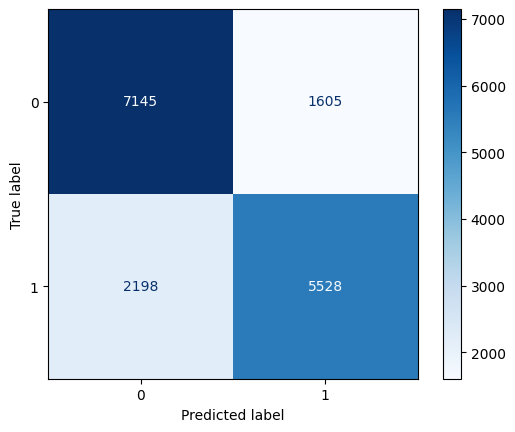

In [44]:
nb_tun =  GaussianNB( var_smoothing =  4.328761281083053e-06)
model_nb_tun = nb_tun.fit(train_x,train_y)
nb_tun_predicted = nb_tun.predict(test_x)

# Evaluation: Confusion matrix#
###############################
nb_tun_acc_score = accuracy_score(test_y, nb_tun_predicted)
nb_tun_conf_matrix = confusion_matrix(test_y, nb_tun_predicted)
nb_tun_tpr = svm_tun_conf_matrix[1][1] /(nb_tun_conf_matrix[1][0] + nb_tun_conf_matrix[1][1])
nb_tun_f1 = f1_score(test_y, nb_tun_predicted)

print(f"The accuracy score of {m7} is: {round(nb_tun_acc_score*100,2)} %")
print(f'Sensitivity (True Positive Rate) of {m7} is: {round(nb_tun_tpr*100,2)} %' ) 
print(f"The f1 score for {m7} is {round(nb_tun_f1*100,2)} %")

print('\n Confusion matrix \n \n')
print(classification_report(test_y, nb_tun_predicted))
ConfusionMatrixDisplay.from_estimator(nb_tun, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

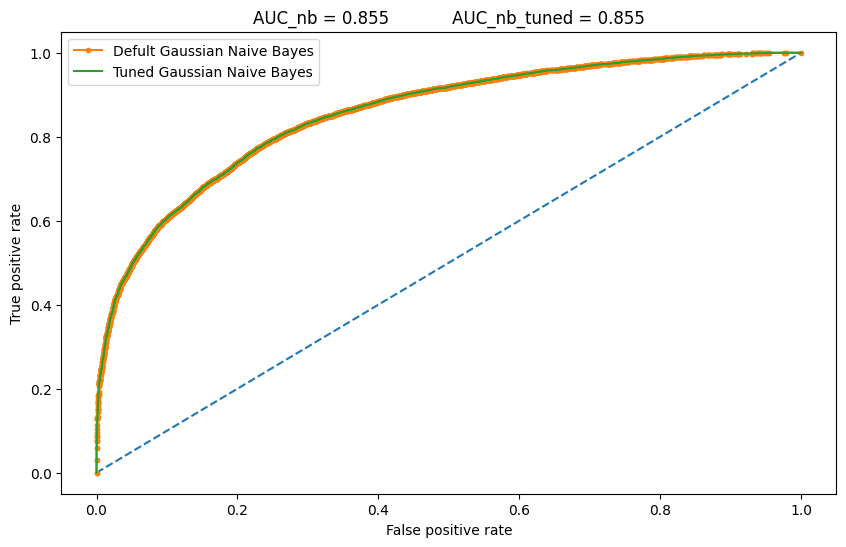

In [45]:
# ROC curve and AUC 
probs_nb = model_nb.predict_proba(test_x)
probs_nb_tun = model_nb_tun.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_nb = probs_nb[:, 1]
probs_nb_tun = probs_nb_tun[:, 1]
# calculate AUC
auc_nb = roc_auc_score(test_y, probs_nb)
auc_nb_tun = roc_auc_score(test_y, probs_nb_tun)
# calculate roc curve
fpr_nb, tpr_nb,thresholds_nb = roc_curve(test_y, probs_nb)
fpr_nb_tun, tpr_nb_tun, thresholds_nb_tun = roc_curve(test_y, probs_nb_tun)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_nb, tpr_nb, marker='.', label="Defult Gaussian Naive Bayes")
plt.plot(fpr_nb_tun, tpr_nb_tun, label="Tuned Gaussian Naive Bayes")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_nb = {round(auc_nb,3)}            AUC_nb_tuned = {round(auc_nb_tun,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

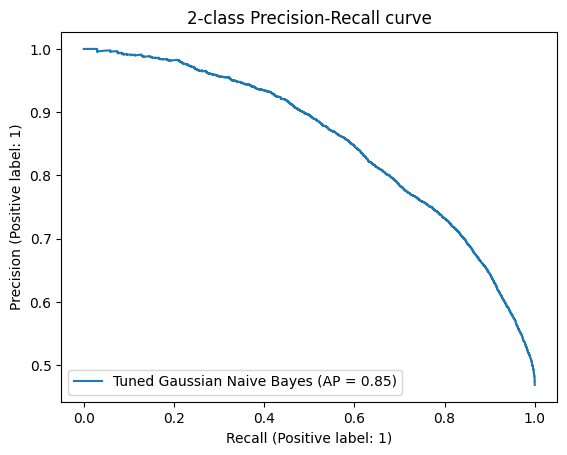

In [46]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_nb_tun, name="Tuned Gaussian Naive Bayes")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
## ML models Ensembling

In order to increase the accuracy of the model we will use stacking technique of ensembling to create an ensembled model.

Fitting 7 classifiers...
Fitting classifier1: logisticregression (1/7)
LogisticRegression(C=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier2: kneighborsclassifier (2/7)
KNeighborsClassifier(n_neighbors=200)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   12.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier3: decisiontreeclassifier (3/7)
DecisionTreeClassifier(max_depth=5, max_features='auto', min_samples_leaf=11,
                       random_state=0)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier4: randomforestclassifier (4/7)
RandomForestClassifier(max_depth=5, max_features='auto', min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1400, random_state=0)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   38.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier5: gradientboostingclassifier (5/7)
GradientBoostingClassifier(max_features='sqrt', min_samples_leaf=2,
                           min_samples_split=5, n_estimators=900,
                           random_state=0)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:   22.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier6: svc (6/7)
SVC(C=10, probability=True)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  8.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting classifier7: gaussiannb (7/7)
GaussianNB(var_smoothing=4.328761281083053e-06)


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    0.0s finished


#############################################################################################
The accuracy score of Stacking CV Classifier is: 80.6 %
Sensitivity (True Positive Rate) of Stacking CV Classifier is: 79.86 %
The f1 score for Stacking CV Classifier is: 79.43 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      8750
           1       0.79      0.80      0.79      7726

    accuracy                           0.81     16476
   macro avg       0.81      0.81      0.81     16476
weighted avg       0.81      0.81      0.81     16476



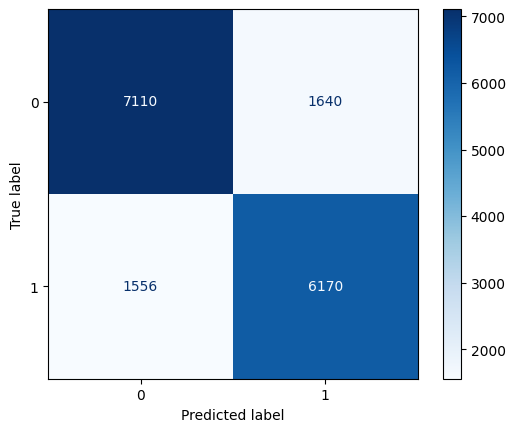

In [47]:
# Stacking CV Classifier
m_ensemble = 'Stacking CV Classifier'
ensemble =  StackingCVClassifier(classifiers=[lr_tun, knn_tun, dt_tun, rf_tun, gb_tun, svm_tun, nb_tun], meta_classifier= rf,
                                verbose=2,
                                n_jobs=-1)
model_ensemble = ensemble.fit(train_x, train_y)
ensemble_predict = ensemble.predict(test_x)

# Evaluation: Confusion matrix
###############################
ensemble_acc = accuracy_score(test_y, ensemble_predict)
cm_ensemble = confusion_matrix(test_y, ensemble_predict) 
tpr_ensemble = cm_ensemble[1][1] /(cm_ensemble[1][0] + cm_ensemble[1][1])
ensemble_f1 = f1_score(test_y, ensemble_predict)
print('#############################################################################################')
print(f'The accuracy score of {m_ensemble} is: {round(ensemble_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m_ensemble} is: {round(tpr_ensemble*100,2)} %' ) 
print(f'The f1 score for {m_ensemble} is: {round(ensemble_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, ensemble_predict ))

ConfusionMatrixDisplay.from_estimator(ensemble, test_x, test_y, cmap = 'Blues')
plt.show()

#### Drawing ROC curve

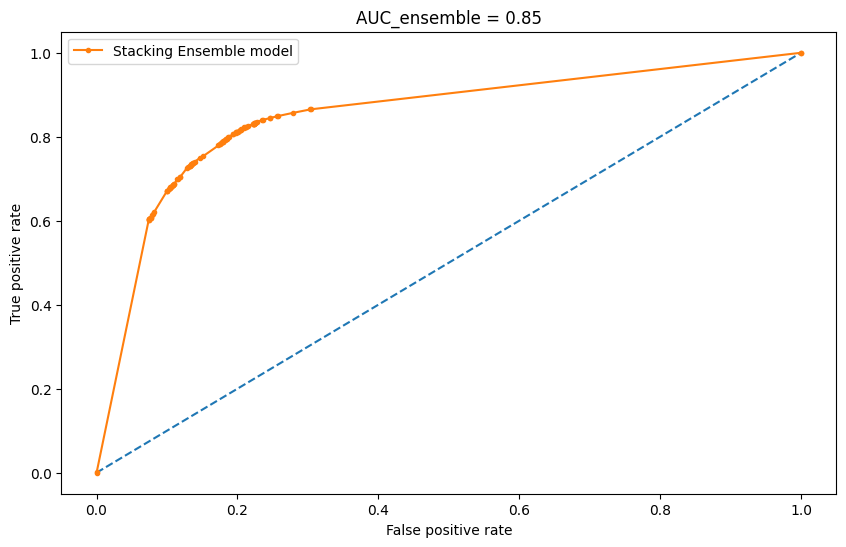

In [48]:
# ROC curve and AUC 
probs_ensemble = model_ensemble.predict_proba(test_x)

# keep probabilities for the positive outcome only
probs_ensemble = probs_ensemble[:, 1]
# calculate AUC
auc_ensemble = roc_auc_score(test_y, probs_ensemble)

# calculate roc curve
fpr_ensemble, tpr_ensemble,thresholds_ensemble = roc_curve(test_y, probs_ensemble)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_ensemble, tpr_ensemble, marker='.', label="Stacking Ensemble model")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_ensemble = {round(auc_ensemble,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

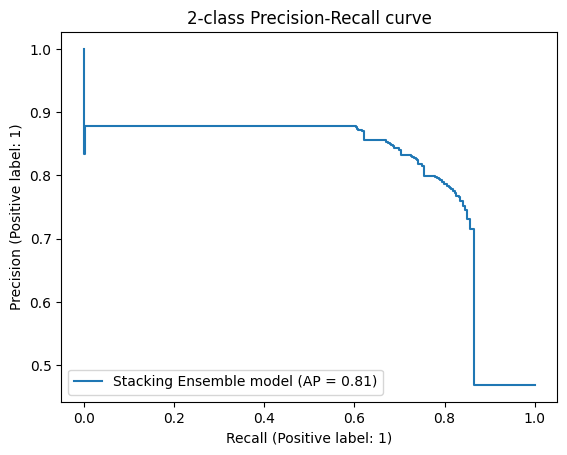

In [49]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_ensemble, name="Stacking Ensemble model")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
## Artificial Neural Network

We'll define an artificial neural network with one hidden layer using keras. Since this is a binary classification problem, we will use a binary crossentropy loss during our training phase and a sigmoid activation function in the network's final layer.

In [52]:
# define a new keras Neural Network model for binary classification
def create_NN_model():
    # create model
    model = Sequential()
    model.add(Dense(5, input_dim=5, kernel_initializer='normal', activation='relu'))
    model.add(Dense(3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile model
    adam = Adam(lr=0.001)
    model.compile(loss='binary_crossentropy', optimizer= adam, metrics=['accuracy'])
    return model

NN_model = create_NN_model()

print(NN_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 52
Trainable params: 52
Non-trainable params: 0
_________________________________________________________________
None


In [53]:
# fit the binary model on the training data
model_NN = NN_model.fit(train_x, train_y, epochs=100, batch_size=10, verbose = 1)
model_NN

Epoch 1/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4883 - accuracy: 0.7611
Epoch 2/100
6591/6591 [==============================] - 16s 2ms/step - loss: 0.4418 - accuracy: 0.7878
Epoch 3/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4305 - accuracy: 0.7923
Epoch 4/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4254 - accuracy: 0.7917
Epoch 5/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4229 - accuracy: 0.7918
Epoch 6/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4216 - accuracy: 0.7923
Epoch 7/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4209 - accuracy: 0.7924
Epoch 8/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4201 - accuracy: 0.7923
Epoch 9/100
6591/6591 [==============================] - 17s 3ms/step - loss: 0.4199 - accuracy: 0.7924
Epoch 10/100
6591/6591 [==============================] - 17s 3m

In [54]:
m_NN = 'Artificial Neural Network'
model_NN_predict = np.round(NN_model.predict(test_x)).astype(int)
# Evaluation: Confusion matrix
###############################
NN_acc = accuracy_score(test_y, model_NN_predict)
cm_NN = confusion_matrix(test_y, model_NN_predict) 
tpr_NN = cm_NN[1][1] /(cm_NN[1][0] + cm_NN[1][1])
NN_f1 = f1_score(test_y, model_NN_predict)
print(f'The accuracy score of {m_NN} is: {round(NN_acc*100,2)} %')
print(f'Sensitivity (True Positive Rate) of {m_NN} is: {round(tpr_NN*100,2)} %' ) 
print(f'The f1 score for {m_NN} is: {round(NN_f1*100,2)} %')

print('\nConfusion matrix \n \n')
print(classification_report(test_y, model_NN_predict ))

515/515 [==============================] - 2s 3ms/step
The accuracy score of Artificial Neural Network is: 79.98 %
Sensitivity (True Positive Rate) of Artificial Neural Network is: 75.15 %
The f1 score for Artificial Neural Network is: 77.88 %

Confusion matrix 
 

              precision    recall  f1-score   support

           0       0.79      0.84      0.82      8750
           1       0.81      0.75      0.78      7726

    accuracy                           0.80     16476
   macro avg       0.80      0.80      0.80     16476
weighted avg       0.80      0.80      0.80     16476



#### Drawing ROC curve

515/515 [==============================] - 2s 3ms/step


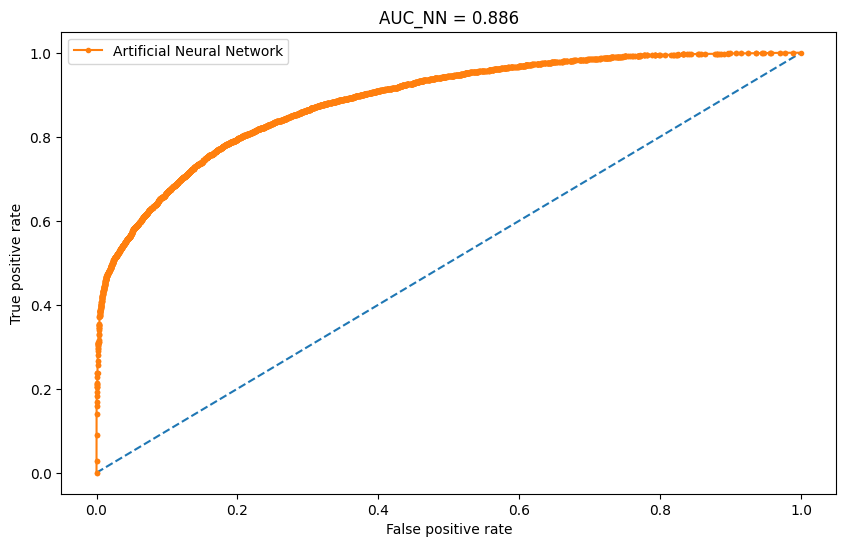

In [55]:
# ROC curve and AUC 
probs_NN = NN_model.predict(test_x).ravel()

auc_NN = roc_auc_score(test_y, probs_NN)

# calculate roc curve
fpr_NN, tpr_NN,thresholds_NN = roc_curve(test_y, probs_NN)
# plot curve
plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr_NN, tpr_NN, marker='.', label="Artificial Neural Network")
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title(f"AUC_NN = {round(auc_NN,3)}")
plt.legend()
plt.show();

#### Drawing Percision-Recall curve (PRC)

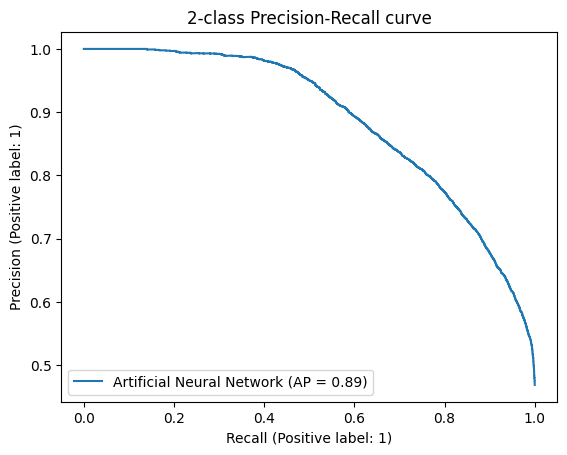

In [56]:
display = PrecisionRecallDisplay.from_predictions(test_y, probs_NN, name="Artificial Neural Network")
_ = display.ax_.set_title("2-class Precision-Recall curve")

---
## Model Evaluation

In [118]:
model_ev = pd.DataFrame({'Model': ['Logistic Regression',
                                   'K-Nearest Neighbour',
                                   'Decision Tree',
                                   'Random Forest',
                                   'Gradient Boosting Classifier',
                                   'Support Vector Machine',
                                  'Gaussian Naive Bayes',
                                  'Staking ML Ensemble',
                                  'Artificial Neural Network'], 
                         'Accuracy %': [round(lr_tun_acc_score*100,2),
                                        round(knn_tun_acc_score*100,2),
                                        round(dt_tun_acc_score*100,2),
                                        round(rf_tun_acc_score*100,2),
                                        round(gb_tun_acc_score*100,2),
                                        round(svm_tun_acc_score*100,2),
                                        round(nb_tun_acc_score*100,2),
                                        round(ensemble_acc*100,2),
                                        round(NN_acc*100,2)],
                        'F1 score %': [round(lr_tun_f1*100,2),
                                        round(knn_tun_f1*100,2),
                                        round(dt_tun_f1*100,2),
                                        round(rf_tun_f1*100,2),
                                        round(gb_tun_f1*100,2),
                                        round(svm_tun_f1*100,2),
                                        round(nb_tun_f1*100,2),
                                        round(ensemble_f1*100,2),
                                        round(NN_f1*100,2)],
                        'AUC %': [round(auc_NN*100,2),
                                        round(auc_knn_tun*100,2),
                                        round(auc_dt_tun*100,2),
                                        round(auc_rf_tun*100,2),
                                        round(auc_gb_tun*100,2),
                                        round(auc_svm_tun*100,2),
                                        round(auc_nb_tun*100,2),
                                        round(auc_ensemble*100,2),
                                        round(auc_NN*100,2)]})
model_ev

,Model,Accuracy %,F1 score %,AUC %
0,Logistic Regression,78.22,76.56,88.56
1,K-Nearest Neighbour,80.03,78.20,89.02
2,Decision Tree,77.69,74.05,86.16
3,Random Forest,79.62,77.56,88.62
4,Gradient Boosting Classifier,80.72,79.30,90.67
5,Support Vector Machine,80.00,77.55,88.33
6,Gaussian Naive Bayes,76.92,74.41,85.50
7,Staking ML Ensemble,80.60,79.43,85.04
8,Artificial Neural Network,79.98,77.88,88.56


### Comparison of Accuracy of ML models

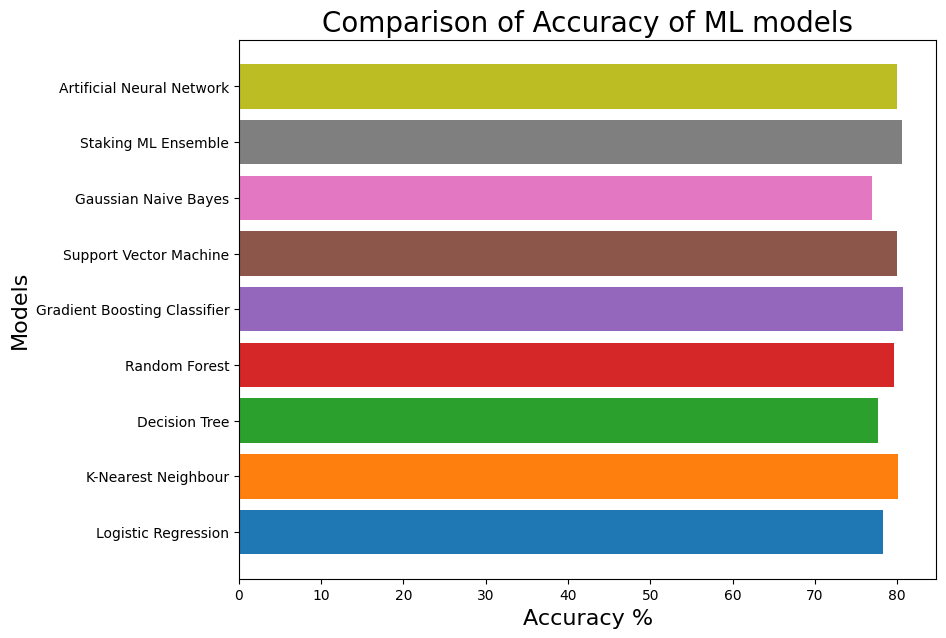

In [116]:
# Barplot Representing Accuracy of different models
from matplotlib import colors as mcolors
colors = dict(mcolors.TABLEAU_COLORS)

plt.figure(figsize=(9,7), facecolor='w')
plt.title("Comparison of Accuracy of ML models", fontsize=20)
plt.xlabel("Accuracy %", fontsize=16)
plt.ylabel("Models", fontsize=16)
plt.barh(model_ev['Model'],model_ev['Accuracy %'], color = colors)
plt.show()

### Drawing comparison of ROC curves

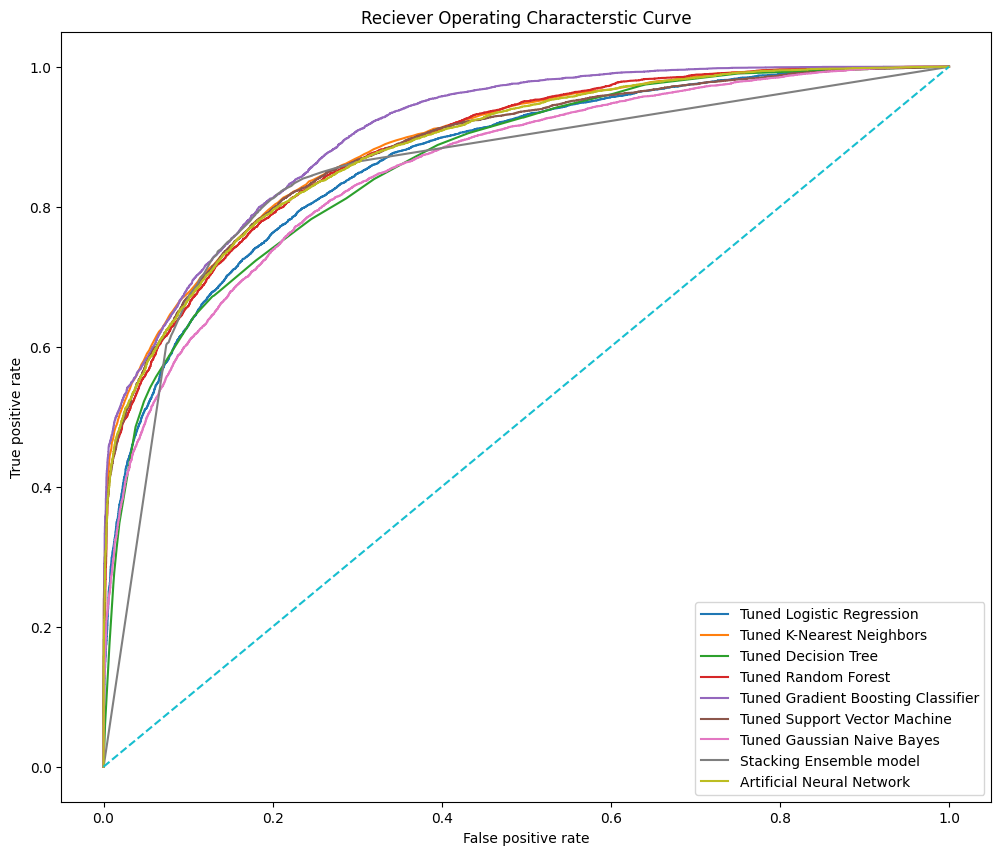

In [103]:
# plot curve

plt.figure(figsize=(12,10), facecolor='w')
plt.title('Reciever Operating Characterstic Curve')
plt.plot(fpr_lr_tun, tpr_lr_tun, label="Tuned Logistic Regression")
plt.plot(fpr_knn_tun, tpr_knn_tun, label="Tuned K-Nearest Neighbors")
plt.plot(fpr_dt_tun, tpr_dt_tun, label="Tuned Decision Tree")
plt.plot(fpr_rf_tun, tpr_rf_tun, label="Tuned Random Forest")
plt.plot(fpr_gb_tun, tpr_gb_tun, label="Tuned Gradient Boosting Classifier")
plt.plot(fpr_svm_tun, tpr_svm_tun, label="Tuned Support Vector Machine")
plt.plot(fpr_nb_tun, tpr_nb_tun, label="Tuned Gaussian Naive Bayes")
plt.plot(fpr_ensemble, tpr_ensemble, label="Stacking Ensemble model")
plt.plot(fpr_NN, tpr_NN, label="Artificial Neural Network")
plt.plot([0,1],ls='--')
#plt.plot([0,0],[1,0],c='.5')
#plt.plot([1,1],c='.5')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show();